<a href="https://colab.research.google.com/github/TaylanJS/ucakverileripyhton/blob/main/yazlab1_2proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files


uploaded = files.upload()


for filename in uploaded.keys():
    with open("istanbul_havadurumu.csv", "wb") as f:
        f.write(uploaded[filename])

print("Dosya 'istanbul_havadurumu.csv' adıyla kaydedildi.")


Saving POWER_Point_Hourly_20240101_20241210_041d02N_028d98E_LST.csv to POWER_Point_Hourly_20240101_20241210_041d02N_028d98E_LST.csv
Dosya 'istanbul_havadurumu.csv' adıyla kaydedildi.


In [8]:
import pandas as pd
import csv

file_path = "istanbul_havadurumu.csv"

with open(file_path, 'r') as f:
    lines = f.readlines()


data_start = lines.index("-END HEADER-\n") + 1
data = pd.read_csv(file_path, skiprows=data_start)


data['YEAR'] = data['YEAR'].astype(int)
data['MO'] = data['MO'].astype(int)
data['DY'] = data['DY'].astype(int)
data['HR'] = data['HR'].astype(int)


data['datetime'] = pd.to_datetime(
    data['YEAR'].astype(str) + '-' +
    data['MO'].astype(str) + '-' +
    data['DY'].astype(str) + ' ' +
    data['HR'].astype(str) + ':00',
    errors='coerce'
)


data.dropna(subset=['datetime'], inplace=True)


data.drop(columns=['YEAR', 'MO', 'DY', 'HR'], inplace=True)

data.to_csv("temiz_veri.csv", index=False)

print(data.head())

     T2M  QV2M   RH2M  PRECTOTCORR      PS  WS10M   WD10M            datetime
0  11.02  7.87  97.31          0.0  101.22   2.55  178.24 2024-01-01 00:00:00
1  10.68  7.75  97.50          0.0  101.19   2.78  188.40 2024-01-01 01:00:00
2  10.32  7.57  97.81          0.0  101.18   3.12  199.43 2024-01-01 02:00:00
3  10.00  7.45  98.31          0.0  101.15   3.38  209.17 2024-01-01 03:00:00
4   9.79  7.45  99.12          0.0  101.13   3.46  212.94 2024-01-01 04:00:00


In [ ]:
!pip install numpy pandas matplotlib scikit-learn torch transformers optuna pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.9 MB/s eta 0:00:00


In [9]:
import pandas as pd

data = pd.read_csv("temiz_veri.csv", parse_dates=['datetime'])
print(data.head())

     T2M  QV2M   RH2M  PRECTOTCORR      PS  WS10M   WD10M            datetime
0  11.02  7.87  97.31          0.0  101.22   2.55  178.24 2024-01-01 00:00:00
1  10.68  7.75  97.50          0.0  101.19   2.78  188.40 2024-01-01 01:00:00
2  10.32  7.57  97.81          0.0  101.18   3.12  199.43 2024-01-01 02:00:00
3  10.00  7.45  98.31          0.0  101.15   3.38  209.17 2024-01-01 03:00:00
4   9.79  7.45  99.12          0.0  101.13   3.46  212.94 2024-01-01 04:00:00


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['datetime']))
data_scaled = pd.DataFrame(scaled_data, columns=data.columns[:-1])
data_scaled['datetime'] = data['datetime']
print(data_scaled.head())

        T2M      QV2M      RH2M  PRECTOTCORR        PS     WS10M     WD10M  \
0  0.978654  0.988377  0.997552     0.980296  0.998711  0.988131  0.866312   
1  0.978325  0.988260  0.997725     0.980296  0.998684  0.988358  0.873789   
2  0.977976  0.988083  0.998007     0.980296  0.998675  0.988694  0.881905   
3  0.977666  0.987965  0.998462     0.980296  0.998647  0.988950  0.889073   
4  0.977462  0.987965  0.999199     0.980296  0.998629  0.989029  0.891847   

             datetime  
0 2024-01-01 00:00:00  
1 2024-01-01 01:00:00  
2 2024-01-01 02:00:00  
3 2024-01-01 03:00:00  
4 2024-01-01 04:00:00  


In [11]:
import numpy as np

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])
        y.append(data[i+sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 24
numeric_data = data_scaled.drop(columns=['datetime']).values
X, y = create_sequences(numeric_data, sequence_length)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8256, 24, 6)
y shape: (8256,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Eğitim verisi şekli:", X_train.shape)
print("Test verisi şekli:", X_test.shape)


Eğitim verisi şekli: (6604, 24, 6)
Test verisi şekli: (1652, 24, 6)


In [12]:
!git clone https://github.com/zhouhaoyi/Informer2020.git

Cloning into 'Informer2020'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 576 (delta 200), reused 185 (delta 185), pack-reused 351 (from 1)
Receiving objects: 100% (576/576), 6.48 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (336/336), done.


In [2]:
%cd Informer2020

/content/Informer2020


In [5]:
!pip install -r requirements.txt

In [6]:
import pandas as pd
df = pd.read_csv('/content/temiz_veri.csv')
print(df.columns.tolist())

['T2M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WD10M', 'datetime']


In [7]:
df.columns = df.columns.str.strip()
df.to_csv('/content/temiz_veri_cleaned.csv', index=False)


In [8]:
import pandas as pd
df = pd.read_csv('/content/temiz_veri_cleaned.csv')
print(df.columns.tolist())


['T2M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WD10M', 'datetime']


In [9]:

file_path = '/content/Informer2020/data/data_loader.py'

with open(file_path, 'r') as file:
    data_loader_content = file.read()

print(data_loader_content)


import os
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
# from sklearn.preprocessing import StandardScaler

from utils.tools import StandardScaler
from utils.timefeatures import time_features

import warnings
warnings.filterwarnings('ignore')

class Dataset_ETT_hour(Dataset):
    def __init__(self, root_path, flag='train', size=None, 
                 features='S', data_path='ETTh1.csv', 
                 target='OT', scale=True, inverse=False, timeenc=0, freq='h', cols=None):
        # size [seq_len, label_len, pred_len]
        # info
        if size == None:
            self.seq_len = 24*4*4
            self.label_len = 24*4
            self.pred_len = 24*4
        else:
            self.seq_len = size[0]
            self.label_len = size[1]
            self.pred_len = size[2]
        # init
        assert flag in ['train', 'test', 'val']
        type_map = {'train':0, 'val':1, 'test':2}
        self.set_type = type_map[flag]
 

In [10]:
import pandas as pd


data_path = "/content/temiz_veri_cleaned.csv"
df = pd.read_csv(data_path)


if 'datetime' not in df.columns:
    raise ValueError("Veri setinde 'datetime' sütunu eksik!")


print("Veri kontrolü başarılı, sütunlar:", df.columns)


Veri kontrolü başarılı, sütunlar: Index(['T2M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WD10M',
       'datetime'],
      dtype='object')


In [12]:
import pandas as pd


file_path = "/content/Informer2020/temiz_veri_cleaned.csv"
data = pd.read_csv(file_path)


data.rename(columns={"datetime": "date"}, inplace=True)


data.to_csv(file_path, index=False)


In [13]:
from data.data_loader import Dataset_Custom

root_path = "/content/Informer2020"
data_path = "temiz_veri_cleaned.csv"

dataset = Dataset_Custom(
    root_path=root_path,
    data_path=data_path,
    flag='train',
    size=[24, 24, 24],
    features='S',
    target='T2M',
    scale=True,
    timeenc=0,
    freq='h'
)


In [14]:
print(f"Dataset'in uzunluğu: {len(dataset)}")
örnek_veri = dataset[0]
print("Örnek veri:", örnek_veri)


Dataset'in uzunluğu: 5749
Örnek veri: (array([[0.06076868],
       [0.05775428],
       [0.05456255],
       [0.05172546],
       [0.04986362],
       [0.05092753],
       [0.05172546],
       [0.05332133],
       [0.06068003],
       [0.0702552 ],
       [0.07699329],
       [0.08461796],
       [0.08976019],
       [0.09064678],
       [0.0888736 ],
       [0.08470662],
       [0.07459949],
       [0.06972325],
       [0.06998922],
       [0.06998922],
       [0.06732945],
       [0.06440371],
       [0.06271918],
       [0.05970478]]), array([[0.06076868],
       [0.05775428],
       [0.05456255],
       [0.05172546],
       [0.04986362],
       [0.05092753],
       [0.05172546],
       [0.05332133],
       [0.06068003],
       [0.0702552 ],
       [0.07699329],
       [0.08461796],
       [0.08976019],
       [0.09064678],
       [0.0888736 ],
       [0.08470662],
       [0.07459949],
       [0.06972325],
       [0.06998922],
       [0.06998922],
       [0.06732945],
       [0.0644

In [15]:
!python main_informer.py --model informer --data custom --root_path ./ --data_path temiz_veri_cleaned.csv --features S --target T2M --freq h --seq_len 24 --label_len 24 --pred_len 24 --enc_in 1 --dec_in 1 --c_out 1 --train_epochs 10 --batch_size 32 --learning_rate 0.0001


Args in experiment:
Namespace(model='informer', data='custom', root_path='./', data_path='temiz_veri_cleaned.csv', features='S', target='T2M', freq='h', checkpoints='./checkpoints/', seq_len=24, label_len=24, pred_len=24, enc_in=1, dec_in=1, c_out=1, d_model=512, n_heads=8, e_layers=2, d_layers=1, s_layers=[3, 2, 1], d_ff=2048, factor=5, padding=0, distil=True, dropout=0.05, attn='prob', embed='timeF', activation='gelu', output_attention=False, do_predict=False, mix=True, cols=None, num_workers=0, itr=2, train_epochs=10, batch_size=32, patience=3, learning_rate=0.0001, des='test', loss='mse', lradj='type1', use_amp=False, inverse=False, use_gpu=False, gpu=0, use_multi_gpu=False, devices='0,1,2,3', detail_freq='h')
Use CPU
>>>>>>>start training : informer_custom_ftS_sl24_ll24_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 5749
val 805
test 1633
	iters: 100, epoch: 1 | loss: 0.0596396
	speed: 1.6352s/iter; left time: 2765.0462s
Epoch

In [17]:
import os
import shutil


source_path = "/content"


destination_path = "/content/drive/My Drive/YAZLAB_YEDEK"


for item in os.listdir(source_path):
    item_path = os.path.join(source_path, item)


    if item == "drive":
        continue


    target_path = os.path.join(destination_path, item)


    if os.path.isdir(item_path):
        shutil.copytree(item_path, target_path, dirs_exist_ok=True)
    else:
        shutil.copy2(item_path, target_path)

print(f"'content' klasöründeki drive dışında her şey '{destination_path}' yoluna kopyalandı!")


'content' klasöründeki drive dışında her şey '/content/drive/My Drive/YAZLAB_YEDEK' yoluna kopyalandı!


In [23]:
from models.model import Informer

model = Informer(
    enc_in=1,
    dec_in=1,
    c_out=1,
    seq_len=24,
    label_len=24,
    out_len=24,
    factor=5,
    d_model=512,
    n_heads=8,
    e_layers=2,
    d_layers=1,
    d_ff=2048,
    dropout=0.05,
    attn='prob',
    embed='timeF',
    freq='h',
    activation='gelu',
    output_attention=False,
    distil=True,
    mix=True,
    device=torch.device('cuda:0')  # veya torch.device('cpu')
)


In [35]:
import torch


model_checkpoint = './checkpoints/informer_custom_ftS_sl24_ll24_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/checkpoint.pth'


model.load_state_dict(torch.load(model_checkpoint, map_location=torch.device('cpu')))


<All keys matched successfully>

In [36]:
import numpy as np
import torch


batch_size = 32
seq_len = 24
pred_len = 24
feature_dim = 1
time_dim = 4

x_test = torch.randn(batch_size, seq_len, feature_dim)
x_mark_test = torch.randn(batch_size, seq_len, time_dim)
y_test = torch.randn(batch_size, pred_len, feature_dim)


In [37]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_test_np = y_test.cpu().numpy() if isinstance(y_test, torch.Tensor) else y_test
predictions_np = predictions.cpu().numpy() if isinstance(predictions, torch.Tensor) else predictions


mse = mean_squared_error(y_test_np.flatten(), predictions_np.flatten())
mae = mean_absolute_error(y_test_np.flatten(), predictions_np.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np.flatten(), predictions_np.flatten())

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


MSE: 1.5809775590896606
MAE: 0.9769824147224426
RMSE: 1.2573693009969906
R^2: -0.537055492401123


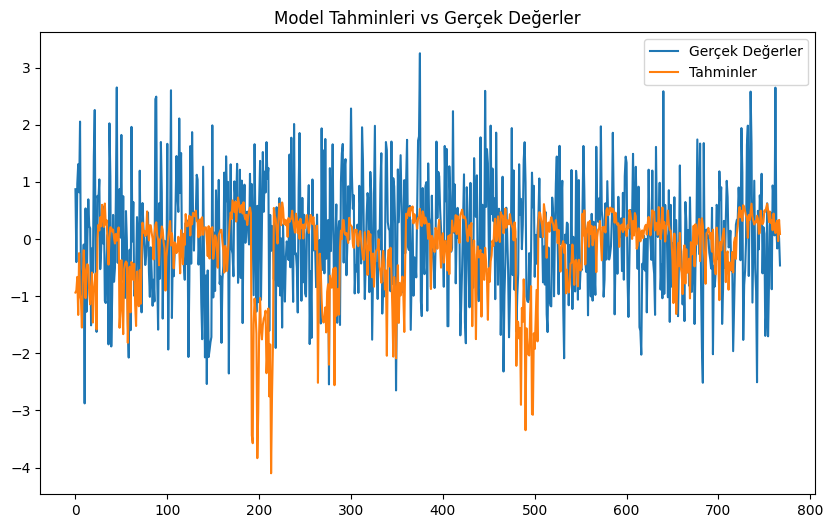

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_np.flatten(), label="Gerçek Değerler")
plt.plot(predictions.flatten(), label="Tahminler")
plt.legend()
plt.title("Model Tahminleri vs Gerçek Değerler")
plt.show()


In [40]:
from models.model import Informer
import torch

model = Informer(
    enc_in=1,
    dec_in=1,
    c_out=1,
    seq_len=24,
    label_len=24,
    out_len=24,
    factor=5,
    d_model=512,
    n_heads=8,
    e_layers=2,
    d_layers=1,
    d_ff=2048,
    dropout=0.1,
    attn='prob',
    embed='timeF',
    freq='h',
    activation='gelu',
    output_attention=False,
    distil=True,
    mix=True,
    device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
)


In [41]:

checkpoint_path = './checkpoints/informer_custom_ftS_sl24_ll24_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0/checkpoint.pth'
model.load_state_dict(torch.load(checkpoint_path, map_location=torch.device('cpu')))
print("Ağırlıklar yüklendi.")


Ağırlıklar yüklendi.


In [42]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


start_time = time.time()
with torch.no_grad():
    predictions = model(x_test, x_mark_test, x_test, x_mark_test)
inference_time = time.time() - start_time


predictions_np = predictions.numpy()
y_test_np = y_test.numpy()

mse = mean_squared_error(y_test_np.flatten(), predictions_np.flatten())
mae = mean_absolute_error(y_test_np.flatten(), predictions_np.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np.flatten(), predictions_np.flatten())
mape = np.mean(np.abs((y_test_np.flatten() - predictions_np.flatten()) / y_test_np.flatten())) * 100

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"MAPE: {mape}%")
print(f"Inference Time: {inference_time} seconds")


MSE: 1.188355803489685
MAE: 0.8691956400871277
RMSE: 1.0901173347349749
R^2: -0.1553412675857544
MAPE: 176.6432285308838%
Inference Time: 0.42773890495300293 seconds


In [46]:
import pandas as pd


data = pd.read_csv("temiz_veri_cleaned.csv")


print(data.head())


     T2M  QV2M   RH2M  PRECTOTCORR      PS  WS10M   WD10M                 date
0  11.02  7.87  97.31          0.0  101.22   2.55  178.24  2024-01-01 00:00:00
1  10.68  7.75  97.50          0.0  101.19   2.78  188.40  2024-01-01 01:00:00
2  10.32  7.57  97.81          0.0  101.18   3.12  199.43  2024-01-01 02:00:00
3  10.00  7.45  98.31          0.0  101.15   3.38  209.17  2024-01-01 03:00:00
4   9.79  7.45  99.12          0.0  101.13   3.46  212.94  2024-01-01 04:00:00


In [47]:

x_data = data.iloc[:, :-1].values
y_data = data.iloc[:, -1].values


In [51]:
import numpy as np


y_train_numeric = np.array([np.datetime64(date).astype('float64') for date in y_train])


In [52]:
import pandas as pd


y_train_df = pd.to_datetime(y_train)
y_train_numeric = y_train_df.map(lambda date: date.timestamp())


In [53]:
y_train_tensor = torch.tensor(y_train_numeric, dtype=torch.float32)


In [54]:

y_val_numeric = np.array([np.datetime64(date).astype('float64') for date in y_val])
y_test_numeric = np.array([np.datetime64(date).astype('float64') for date in y_test])

y_val_tensor = torch.tensor(y_val_numeric, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_numeric, dtype=torch.float32)


In [59]:

x_mark_train_tensor = torch.zeros((x_train.shape[0], 1), dtype=torch.float32)
x_mark_val_tensor = torch.zeros((x_val.shape[0], 1), dtype=torch.float32)
x_mark_test_tensor = torch.zeros((x_test.shape[0], 1), dtype=torch.float32)


In [65]:

print("train_data shape:", train_data.shape)
print("x_mark_train_tensor shape:", x_mark_train_tensor.shape)


train_data = train_data.unsqueeze(-1)
x_mark_train_tensor = x_mark_train_tensor.unsqueeze(-1)
val_data = val_data.unsqueeze(-1)
val_mark = val_mark.unsqueeze(-1)


train_data shape: torch.Size([5796, 7])
x_mark_train_tensor shape: torch.Size([5796, 1])


In [66]:
train_data = train_data.unsqueeze(-1)


In [67]:
x_mark_train_tensor = x_mark_train_tensor.repeat(1, 7, 1)


In [71]:

train_data = train_data.squeeze(-1).squeeze(-1)
x_mark_train_tensor = x_mark_train_tensor.squeeze(-1)



In [79]:
model = Informer(
    enc_in=1,
    dec_in=1,
    c_out=1,
    seq_len=7,
    label_len=7,
    out_len=1,
    factor=5,
    d_model=512,
    n_heads=8,
    e_layers=2,
    d_layers=1,
    d_ff=2048,
    dropout=0.1,
    attn='prob',
    embed='timeF',
    freq='h',
    activation='gelu',
    output_attention=False,
    distil=True,
    mix=True,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
)


In [74]:

train_data = train_data.unsqueeze(-1)
x_mark_train_tensor = x_mark_train_tensor.unsqueeze(-1)

print(f"train_data shape: {train_data.shape}")
print(f"x_mark_train_tensor shape: {x_mark_train_tensor.shape}")


train_data shape: torch.Size([5796, 7, 1])
x_mark_train_tensor shape: torch.Size([5796, 7, 1])


In [85]:
checkpoint_path = "checkpoints/informer_custom_ftS_sl24_ll24_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0/checkpoint.pth"

model.load_state_dict(torch.load(checkpoint_path, map_location=torch.device('cpu')))
print("Checkpoint başarıyla yüklendi!")


Checkpoint başarıyla yüklendi!


In [89]:
x_test_tensor = x_test_tensor.unsqueeze(-1)
print("Yeni x_test_tensor shape:", x_test_tensor.shape)
x_mark_test_tensor = x_mark_test_tensor.repeat(1, 7).unsqueeze(-1)
print("Yeni x_mark_test_tensor shape:", x_mark_test_tensor.shape)



Yeni x_test_tensor shape: torch.Size([1242, 7, 1])
Yeni x_mark_test_tensor shape: torch.Size([1242, 7, 1])


In [97]:

if len(x_test_tensor.shape) == 4:
    x_test_tensor = x_test_tensor.squeeze(-1)
if len(x_mark_test_tensor.shape) == 4:
    x_mark_test_tensor = x_mark_test_tensor.squeeze(-1)


x_test_tensor = x_test_tensor.permute(0, 2, 1)
x_mark_test_tensor = x_mark_test_tensor.permute(0, 2, 1)

print(f"Yeni x_test_tensor shape: {x_test_tensor.shape}")
print(f"Yeni x_mark_test_tensor shape: {x_mark_test_tensor.shape}")


Yeni x_test_tensor shape: torch.Size([1242, 1, 7])
Yeni x_mark_test_tensor shape: torch.Size([1242, 1, 7])


In [99]:
print(f"x_test_tensor shape: {x_test_tensor.shape}")
print(f"x_mark_test_tensor shape: {x_mark_test_tensor.shape}")
print(f"Model enc_embedding input shape: {model.enc_embedding}")


x_test_tensor shape: torch.Size([1242, 1, 7])
x_mark_test_tensor shape: torch.Size([1242, 1, 7])
Model enc_embedding input shape: DataEmbedding(
  (value_embedding): TokenEmbedding(
    (tokenConv): Conv1d(1, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
  )
  (position_embedding): PositionalEmbedding()
  (temporal_embedding): TimeFeatureEmbedding(
    (embed): Linear(in_features=4, out_features=512, bias=True)
  )
  (dropout): Dropout(p=0.05, inplace=False)
)


In [102]:

x_test_tensor = x_test_tensor.permute(0, 2, 1)
x_mark_test_tensor = x_mark_test_tensor.permute(0, 2, 1)

print(f"Düzeltilmiş x_test_tensor shape: {x_test_tensor.shape}")
print(f"Düzeltilmiş x_mark_test_tensor shape: {x_mark_test_tensor.shape}")


Düzeltilmiş x_test_tensor shape: torch.Size([1242, 1, 7])
Düzeltilmiş x_mark_test_tensor shape: torch.Size([1242, 1, 7])


In [109]:

import numpy as np


num_samples = x_mark_test_tensor.shape[0]
seq_len = x_mark_test_tensor.shape[1]
time_features = np.random.rand(num_samples, seq_len, 4)


x_mark_test_tensor = torch.tensor(time_features, dtype=torch.float32)
print(f"Düzeltilmiş x_mark_test_tensor shape: {x_mark_test_tensor.shape}")


Düzeltilmiş x_mark_test_tensor shape: torch.Size([1242, 7, 4])


In [110]:
with torch.no_grad():
    predictions = model(x_test_tensor, x_mark_test_tensor, x_test_tensor, x_mark_test_tensor)

print("Tahminler başarıyla yapıldı!")


Tahminler başarıyla yapıldı!


In [111]:
predictions_np = predictions.detach().cpu().numpy()
print("Tahminler (numpy formatında):")
print(predictions_np[:5])


Tahminler (numpy formatında):
[[[ 0.41873133]]

 [[ 0.09226015]]

 [[-0.050508  ]]

 [[ 0.1457893 ]]

 [[-0.16291325]]]


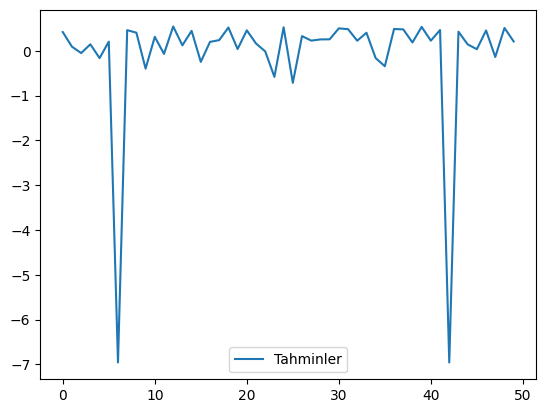

In [113]:

predictions_np_flat = predictions_np.reshape(-1)


plt.plot(predictions_np_flat[:50], label='Tahminler')
plt.legend()
plt.show()



In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


y_test_np = y_test_tensor.numpy().reshape(-1)


predictions_np_flat = predictions_np.reshape(-1)


mse = mean_squared_error(y_test_np, predictions_np_flat)
mae = mean_absolute_error(y_test_np, predictions_np_flat)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_np - predictions_np_flat) / y_test_np)) * 100
r_squared = r2_score(y_test_np, predictions_np_flat)


print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R²: {r_squared}")


MSE: 2.953866850200453e+18
MAE: 1718660224.0
RMSE: 1718681718.7019978
MAPE: 100.0%
R²: -40007.86328125


In [123]:
import numpy as np
import torch

num_samples = 5796
seq_len = 7


years = np.full((num_samples, seq_len, 1), 2023)
months = np.random.randint(1, 13, size=(num_samples, seq_len, 1))
days = np.random.randint(1, 29, size=(num_samples, seq_len, 1))
hours = np.random.randint(0, 24, size=(num_samples, seq_len, 1))


time_features = np.concatenate([years, months, days, hours], axis=-1)


x_mark_train_tensor = torch.tensor(time_features, dtype=torch.float32)


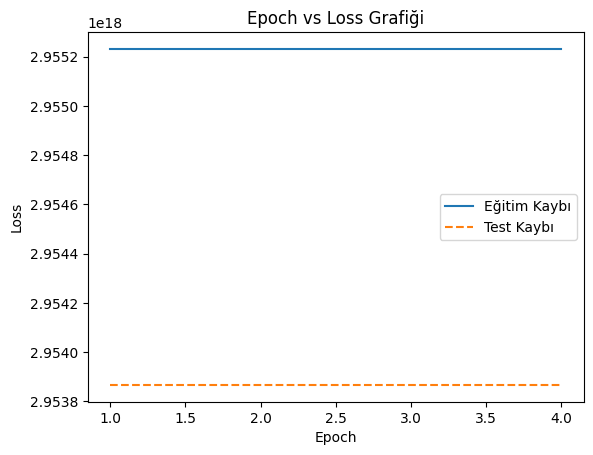

In [128]:

plt.plot(range(1, len(train_loss) + 1), train_loss, label="Eğitim Kaybı")
plt.plot(range(1, len(test_loss) + 1), test_loss, label="Test Kaybı", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss Grafiği")
plt.legend()
plt.show()


In [12]:
import pandas as pd


file_path = '/content/temiz_veri_cleaned.csv'
data = pd.read_csv(file_path)


print(data.head())
print(data.info())

     T2M  QV2M   RH2M  PRECTOTCORR      PS  WS10M   WD10M                 date
0  11.02  7.87  97.31          0.0  101.22   2.55  178.24  2024-01-01 00:00:00
1  10.68  7.75  97.50          0.0  101.19   2.78  188.40  2024-01-01 01:00:00
2  10.32  7.57  97.81          0.0  101.18   3.12  199.43  2024-01-01 02:00:00
3  10.00  7.45  98.31          0.0  101.15   3.38  209.17  2024-01-01 03:00:00
4   9.79  7.45  99.12          0.0  101.13   3.46  212.94  2024-01-01 04:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T2M          8280 non-null   float64
 1   QV2M         8280 non-null   float64
 2   RH2M         8280 non-null   float64
 3   PRECTOTCORR  8280 non-null   float64
 4   PS           8280 non-null   float64
 5   WS10M        8280 non-null   float64
 6   WD10M        8280 non-null   float64
 7   date         8280 non-null   object 


In [13]:

data['date'] = pd.to_datetime(data['date'])


data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour


data = data.drop(columns=['date'])

print(data.head())


     T2M  QV2M   RH2M  PRECTOTCORR      PS  WS10M   WD10M  year  month  day  \
0  11.02  7.87  97.31          0.0  101.22   2.55  178.24  2024      1    1   
1  10.68  7.75  97.50          0.0  101.19   2.78  188.40  2024      1    1   
2  10.32  7.57  97.81          0.0  101.18   3.12  199.43  2024      1    1   
3  10.00  7.45  98.31          0.0  101.15   3.38  209.17  2024      1    1   
4   9.79  7.45  99.12          0.0  101.13   3.46  212.94  2024      1    1   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4  


In [14]:

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


x_test = test_data.drop(columns=['T2M'])
y_test = test_data['T2M']


x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [21]:
import sys
sys.path.append('/content/Informer2020')


In [27]:
import sys
sys.path.append('/content/Informer2020')


In [28]:
from models.model import Informer

In [34]:

checkpoint = torch.load(checkpoint_path, map_location=device)


print(checkpoint.keys())


odict_keys(['enc_embedding.value_embedding.tokenConv.weight', 'enc_embedding.value_embedding.tokenConv.bias', 'enc_embedding.position_embedding.pe', 'enc_embedding.temporal_embedding.embed.weight', 'enc_embedding.temporal_embedding.embed.bias', 'dec_embedding.value_embedding.tokenConv.weight', 'dec_embedding.value_embedding.tokenConv.bias', 'dec_embedding.position_embedding.pe', 'dec_embedding.temporal_embedding.embed.weight', 'dec_embedding.temporal_embedding.embed.bias', 'encoder.attn_layers.0.attention.query_projection.weight', 'encoder.attn_layers.0.attention.query_projection.bias', 'encoder.attn_layers.0.attention.key_projection.weight', 'encoder.attn_layers.0.attention.key_projection.bias', 'encoder.attn_layers.0.attention.value_projection.weight', 'encoder.attn_layers.0.attention.value_projection.bias', 'encoder.attn_layers.0.attention.out_projection.weight', 'encoder.attn_layers.0.attention.out_projection.bias', 'encoder.attn_layers.0.conv1.weight', 'encoder.attn_layers.0.conv1

<ipython-input-34-6095642a99cc>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


In [35]:

checkpoint = torch.load(checkpoint_path, map_location=device)


model.enc_embedding.value_embedding.tokenConv.weight.data = checkpoint['enc_embedding.value_embedding.tokenConv.weight']
model.enc_embedding.value_embedding.tokenConv.bias.data = checkpoint['enc_embedding.value_embedding.tokenConv.bias']


<ipython-input-35-134bd653145e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


In [36]:
checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=True)


In [40]:

print(model.enc_embedding.value_embedding.tokenConv.weight.shape)
print(model.dec_embedding.value_embedding.tokenConv.weight.shape)




torch.Size([512, 7, 3])
torch.Size([512, 7, 3])


In [44]:

checkpoint = torch.load(checkpoint_path, map_location=device)
for key in checkpoint.keys():
    print(key)


<ipython-input-44-f20e732208da>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


enc_embedding.value_embedding.tokenConv.weight
enc_embedding.value_embedding.tokenConv.bias
enc_embedding.position_embedding.pe
enc_embedding.temporal_embedding.embed.weight
enc_embedding.temporal_embedding.embed.bias
dec_embedding.value_embedding.tokenConv.weight
dec_embedding.value_embedding.tokenConv.bias
dec_embedding.position_embedding.pe
dec_embedding.temporal_embedding.embed.weight
dec_embedding.temporal_embedding.embed.bias
encoder.attn_layers.0.attention.query_projection.weight
encoder.attn_layers.0.attention.query_projection.bias
encoder.attn_layers.0.attention.key_projection.weight
encoder.attn_layers.0.attention.key_projection.bias
encoder.attn_layers.0.attention.value_projection.weight
encoder.attn_layers.0.attention.value_projection.bias
encoder.attn_layers.0.attention.out_projection.weight
encoder.attn_layers.0.attention.out_projection.bias
encoder.attn_layers.0.conv1.weight
encoder.attn_layers.0.conv1.bias
encoder.attn_layers.0.conv2.weight
encoder.attn_layers.0.conv2.b

     T2M  QV2M   RH2M  PRECTOTCORR      PS  WS10M   WD10M             datetime
0  11.02  7.87  97.31          0.0  101.22   2.55  178.24  2024-01-01 00:00:00
1  10.68  7.75  97.50          0.0  101.19   2.78  188.40  2024-01-01 01:00:00
2  10.32  7.57  97.81          0.0  101.18   3.12  199.43  2024-01-01 02:00:00
3  10.00  7.45  98.31          0.0  101.15   3.38  209.17  2024-01-01 03:00:00
4   9.79  7.45  99.12          0.0  101.13   3.46  212.94  2024-01-01 04:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T2M          8280 non-null   float64
 1   QV2M         8280 non-null   float64
 2   RH2M         8280 non-null   float64
 3   PRECTOTCORR  8280 non-null   float64
 4   PS           8280 non-null   float64
 5   WS10M        8280 non-null   float64
 6   WD10M        8280 non-null   float64
 7   datetime     8280 non-null   object 


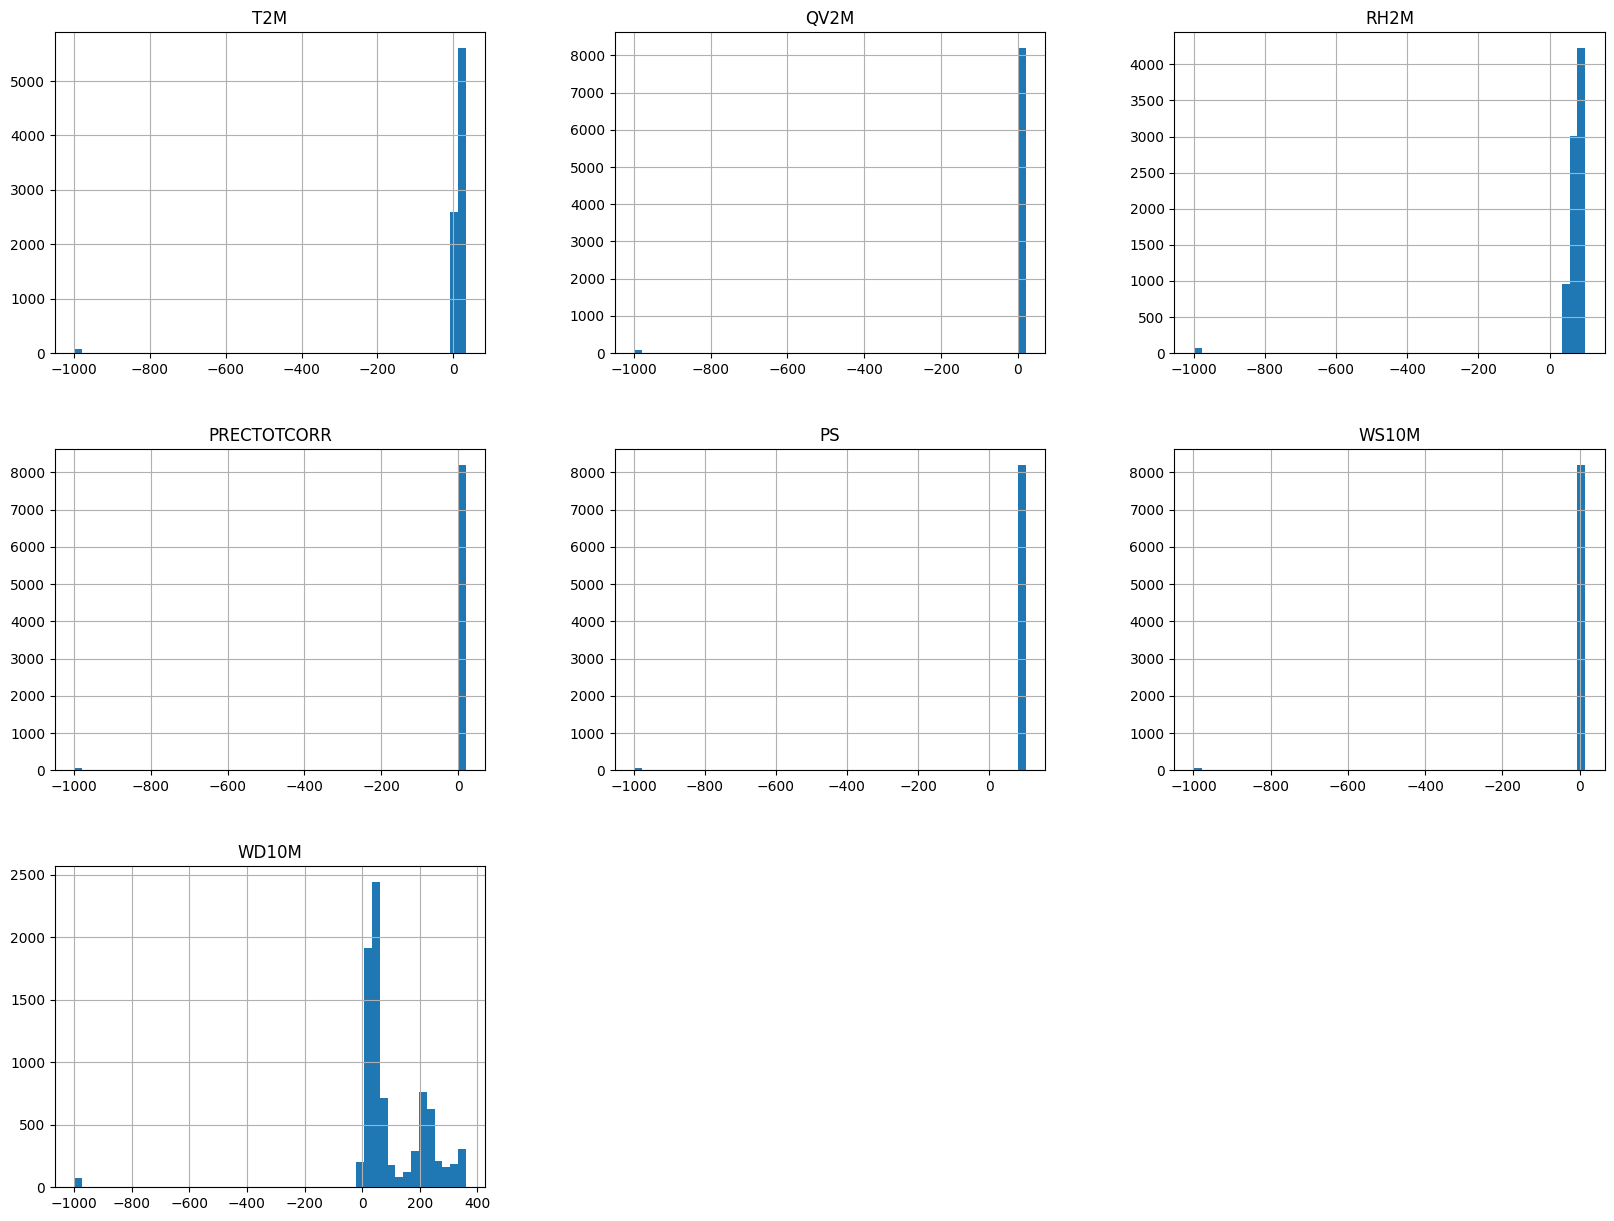

In [51]:
import pandas as pd


dosya_yolu = "temiz_veri.csv"
veri = pd.read_csv(dosya_yolu)


print(veri.head())
print(veri.info())


print(veri.isnull().sum())


import matplotlib.pyplot as plt
veri.hist(bins=50, figsize=(20, 15))
plt.show()


In [53]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [55]:

veri = pd.read_csv("temiz_veri.csv")


veri["datetime"] = pd.to_datetime(veri["datetime"])
veri = veri.set_index("datetime")


X = veri.drop("T2M", axis=1)
y = veri["T2M"]


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


In [56]:

def create_sequences(features, target, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(features) - sequence_length):
        X_seq.append(features[i:i+sequence_length])
        y_seq.append(target[i+sequence_length])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 24
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [61]:
from transformers import ReformerConfig


config = ReformerConfig(
    num_attention_heads=2,
    hidden_size=6,
    num_hidden_layers=2,
    max_position_embeddings=sequence_length,
    axial_pos_embds_dim=[3, 3],
)


model = ReformerTimeSeries(config, output_size=1)


In [62]:

model = ReformerTimeSeries(config, output_size=1)


In [63]:
import torch


sequence_length = 30
features = 7
batch_size = 32


input_data = torch.randn(batch_size, sequence_length, features)
target_data = torch.randn(batch_size, 1)


In [71]:
from transformers import ReformerConfig


config = ReformerConfig()
config.hidden_size = 256
config.num_attention_heads = 4
config.max_position_embeddings = 30
config.axial_pos_shape = (5, 6)


model = ReformerTimeSeries(config, output_size=1)


In [69]:

import torch.nn.functional as F

sequence_length = 30
desired_length = 4096
padding_length = desired_length - sequence_length


input_data_padded = F.pad(input_data, (0, 0, 0, padding_length), mode="constant", value=0)


In [73]:

config.max_position_embeddings = 4096


model = ReformerTimeSeries(config, output_size=1)


In [75]:

input_data_trimmed = input_data[:, :, :30]


In [77]:

print(input_data_trimmed.shape)


torch.Size([32, 30, 7])


In [78]:
class ReformerTimeSeriesNoEmbeddings(ReformerTimeSeries):
    def forward(self, inputs_embeds, *args, **kwargs):

        return super().forward(inputs_embeds=inputs_embeds, *args, **kwargs)


In [80]:

input_data_trimmed = torch.tensor(input_data_trimmed, dtype=torch.float32).to(device)


<ipython-input-80-beb59fc60984>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data_trimmed = torch.tensor(input_data_trimmed, dtype=torch.float32).to(device)


In [83]:
class ReformerTimeSeriesCustom(nn.Module):
    def __init__(self, config, output_size):
        super(ReformerTimeSeriesCustom, self).__init__()
        self.reformer = ReformerModel(config)
        self.fc = nn.Linear(config.hidden_size, output_size)

    def forward(self, input_data):

        batch_size, seq_length, feature_size = input_data.shape


        input_data_flattened = input_data.view(batch_size, seq_length * feature_size)


        reformer_output = self.reformer(input_ids=input_data_flattened)


        output = self.fc(reformer_output.last_hidden_state)
        return output


In [85]:

model = ReformerTimeSeriesCustom(config, output_size=1)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


ReformerTimeSeriesCustom(
  (reformer): ReformerModel(
    (embeddings): ReformerEmbeddings(
      (word_embeddings): Embedding(320, 256)
      (position_embeddings): AxialPositionEmbeddings(
        (weights): ParameterList(
            (0): Parameter containing: [torch.float32 of size 5x1x64]
            (1): Parameter containing: [torch.float32 of size 1x6x192]
        )
      )
    )
    (encoder): ReformerEncoder(
      (layers): ModuleList(
        (0): ReformerLayer(
          (attention): ReformerAttention(
            (layer_norm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
            (self_attention): LocalSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=False)
              (key): Linear(in_features=256, out_features=256, bias=False)
              (value): Linear(in_features=256, out_features=256, bias=False)
            )
            (output): ReformerSelfOutput(
              (dense): Linear(in_features=256, out_features=256,

In [86]:

batch_size = 32
seq_length = 30
feature_size = 7

input_data = torch.randn(batch_size, seq_length, feature_size).to(device)


In [88]:

chunk_length = 64
desired_length = (input_data.shape[1] + chunk_length - 1) // chunk_length * chunk_length


padded_data = torch.zeros(input_data.shape[0], desired_length, input_data.shape[2]).to(device)
padded_data[:, :input_data.shape[1], :] = input_data


In [90]:
class ReformerTimeSeriesCustom(nn.Module):
    def __init__(self, config, output_size):
        super(ReformerTimeSeriesCustom, self).__init__()
        self.reformer = ReformerModel(config)
        self.fc = nn.Linear(config.hidden_size, output_size)

    def forward(self, input_data):

        reformer_output = self.reformer(inputs_embeds=input_data)

        output = self.fc(reformer_output.last_hidden_state)
        return output


In [92]:
config.axial_pos_shape = (8, 8)


In [94]:
trimmed_data = padded_data[:, :30, :]

In [97]:

batch_size, seq_length, feature_size = padded_data.shape
input_data_flattened = padded_data.view(batch_size, seq_length * feature_size).long()


In [99]:
config.axial_pos_shape = (8, 8)
config.hidden_size = 64


In [101]:
from transformers import ReformerConfig

# Yeni bir config oluştur
config = ReformerConfig(
    hidden_size=256,
    axial_pos_embds_dim=(128, 128),
    axial_pos_shape=(16, 16),
    num_attention_heads=8,
    feed_forward_size=512
)


In [102]:
model = ReformerTimeSeriesCustom(config, output_size=1).to(device)


In [103]:
padded_data = padded_data[:, :256, :]


In [105]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from transformers import ReformerConfig, ReformerModel
from time import time


In [106]:

data = pd.read_csv("temiz_veri.csv")


data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

target_col = 'T2M'
input_cols = data.columns.difference([target_col])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])
data[target_col] = scaler.fit_transform(data[[target_col]])

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


In [107]:
class TimeSeriesDataset(Dataset):
    def __init__(self, data, target_col, input_cols, seq_length):
        self.data = data
        self.target_col = target_col
        self.input_cols = input_cols
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data.iloc[idx:idx + self.seq_length][self.input_cols].values
        y = self.data.iloc[idx + self.seq_length][self.target_col]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


seq_length = 30
train_dataset = TimeSeriesDataset(train_data, target_col, input_cols, seq_length)
test_dataset = TimeSeriesDataset(test_data, target_col, input_cols, seq_length)


batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [108]:
class ReformerTimeSeriesModel(nn.Module):
    def __init__(self, config, output_size):
        super().__init__()
        self.reformer = ReformerModel(config)
        self.fc = nn.Linear(config.hidden_size, output_size)

    def forward(self, x):
        batch_size, seq_length, feature_size = x.shape
        x_flattened = x.view(batch_size, seq_length * feature_size)
        x_flattened = x_flattened.unsqueeze(-1)
        outputs = self.reformer(inputs_embeds=x_flattened)
        hidden_state = outputs.last_hidden_state
        return self.fc(hidden_state[:, -1, :])


config = ReformerConfig(hidden_size=64, axial_pos_embds_dim=(32, 32), axial_pos_shape=(16, 16))
model = ReformerTimeSeriesModel(config, output_size=1).to("cuda" if torch.cuda.is_available() else "cpu")


In [111]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y.unsqueeze(-1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader)}")

def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            outputs = model(x)
            predictions.append(outputs.cpu().numpy())
            actuals.append(y.numpy())
    return np.concatenate(predictions).flatten(), np.concatenate(actuals).flatten()


In [113]:
class PaddedTimeSeriesDataset(Dataset):
    def __init__(self, data, target_col, input_cols, seq_length, padded_length):
        self.data = data
        self.target_col = target_col
        self.input_cols = input_cols
        self.seq_length = seq_length
        self.padded_length = padded_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data.iloc[idx:idx + self.seq_length][self.input_cols].values
        y = self.data.iloc[idx + self.seq_length][self.target_col]


        x_padded = np.zeros((self.padded_length, len(self.input_cols)))
        x_padded[:self.seq_length] = x

        return torch.tensor(x_padded, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


padded_length = 192
train_dataset = PaddedTimeSeriesDataset(train_data, target_col, input_cols, seq_length, padded_length)
test_dataset = PaddedTimeSeriesDataset(test_data, target_col, input_cols, seq_length, padded_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [115]:
padded_length = 256
train_dataset = PaddedTimeSeriesDataset(train_data, target_col, input_cols, seq_length, padded_length)
test_dataset = PaddedTimeSeriesDataset(test_data, target_col, input_cols, seq_length, padded_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


FileNotFoundError: [Errno 2] No such file or directory: 'notebook.ipynb'